In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('../data/songs.csv')

In [21]:
# explore
data.head()

,name,party rhymes,folk influences,indian influences,use of ambient synths,sexist lyrics,catchy hooks,Puerto Rican roots,a knack for catchy hooks,subtle use of white noise,...,use of techno synths,ska influences,prominent drums,cash obsessed lyrics,surreal lyrics,rhythmic clapping,jazz influences,arpeggiated synths,varying tempo and time signatures,cluster
0,/andybody/1st-bass-is-deepest-single/1st-bass-...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,3
1,/angels-airwaves/everythings-magic/everythings...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2,/angels-airwaves/i-empire/call-to-arms,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,/angels-airwaves/i-empire/secret-crowds,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
4,/angels-airwaves/warped-tour-2008-compilation/...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2


In [22]:
# 314 columns, oof...

In [34]:
################
### Exercise ###
################

# How would I check how many songs I like with "indian influences"
indian_cols = [col for col in data.columns if 'indian' in col]
# print(list(df.columns))
print(indian_cols)
data[indian_cols].groupby('indian influences').count()

['indian influences']


""
indian influences
False
True


In [35]:
# drop the name out of the data set
X = data.drop('name', axis=1)

In [36]:
# perform clustering with 4 clusters
song_cluster = KMeans(n_clusters=4, init='random')
song_cluster.fit(X)
y_kmeans = song_cluster.predict(data.drop('name', axis=1))
data['cluster'] = y_kmeans

In [38]:
################
### Exercise ###
################

# List the songs in each cluster

data['cluster'] = song_cluster.labels_
data[['name','cluster']].sort('cluster')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,cluster
0,/andybody/1st-bass-is-deepest-single/1st-bass-...,0
128,/morgan-page/2008-party-playlist-masterbeat/lo...,0
126,/mia-martina/devotion/turn-it-up,0
119,/martin-garrix/casablanca-nights-vol-1-explici...,0
118,/martin-garrix/annual-2014-ministry-of-sound/a...,0
116,/martin-garrix-jay-hardway/wizard-remixes/wiza...,0
115,/martin-garrix-jay-hardway/error-404-single/er...,0
114,/major-lazer/all-trap-music-vol-2/jah-no-parti...,0
107,/lindsey-stirling/lindsey-stirling-deluxe-vers...,0
106,/lindsey-stirling/lindsey-stirling-deluxe-vers...,0


In [ ]:
################
### Exercise ###
################

# Can you think of a good "title" for each cluster? For example is any of them the "rock" genre, or "electronics?
# Do any songs "not belong"?


In [41]:
################
### Exercise ###
################

# Compute the Silhouette Score of this clustering
from sklearn import metrics
metrics.silhouette_score(X, song_cluster.labels_)

0.14258040370109792

In [45]:
################
### Exercise ###
################

# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

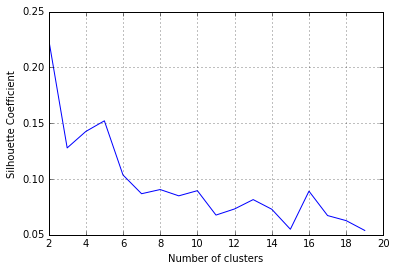

In [46]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
################
### Exercise ###
################

# What is the optimal number of clusters? 5

In [ ]:
################
### Exercise ###
################

# Can you figure out how to turn this into a sort of recommendation engins?